In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Walmart_Sales.csv")
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
df = pd.DataFrame(data)
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [6]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [7]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [8]:
print("Missing values:", df.isnull().sum())
print("Duplicates:", df.duplicated().sum())

Missing values: Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64
Duplicates: 0


In [9]:
# Numerical Columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
print(f"Numerical Columns: {list(numerical_cols)}")

Numerical Columns: ['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']


In [10]:
# Numerical Columns
Categorical_cols = data.select_dtypes(include=['object']).columns
print(f"Categorical Columns: {list(Categorical_cols)}")

Categorical Columns: ['Date']


In [11]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")

# Extract time-based features
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['WeekOfYear'] = df['Date'].dt.isocalendar().week
df['DayOfWeek'] = df['Date'].dt.dayofweek

In [12]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,WeekOfYear,DayOfWeek
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010,5,4
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010,6,4
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,7,4
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,8,4
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010,9,4


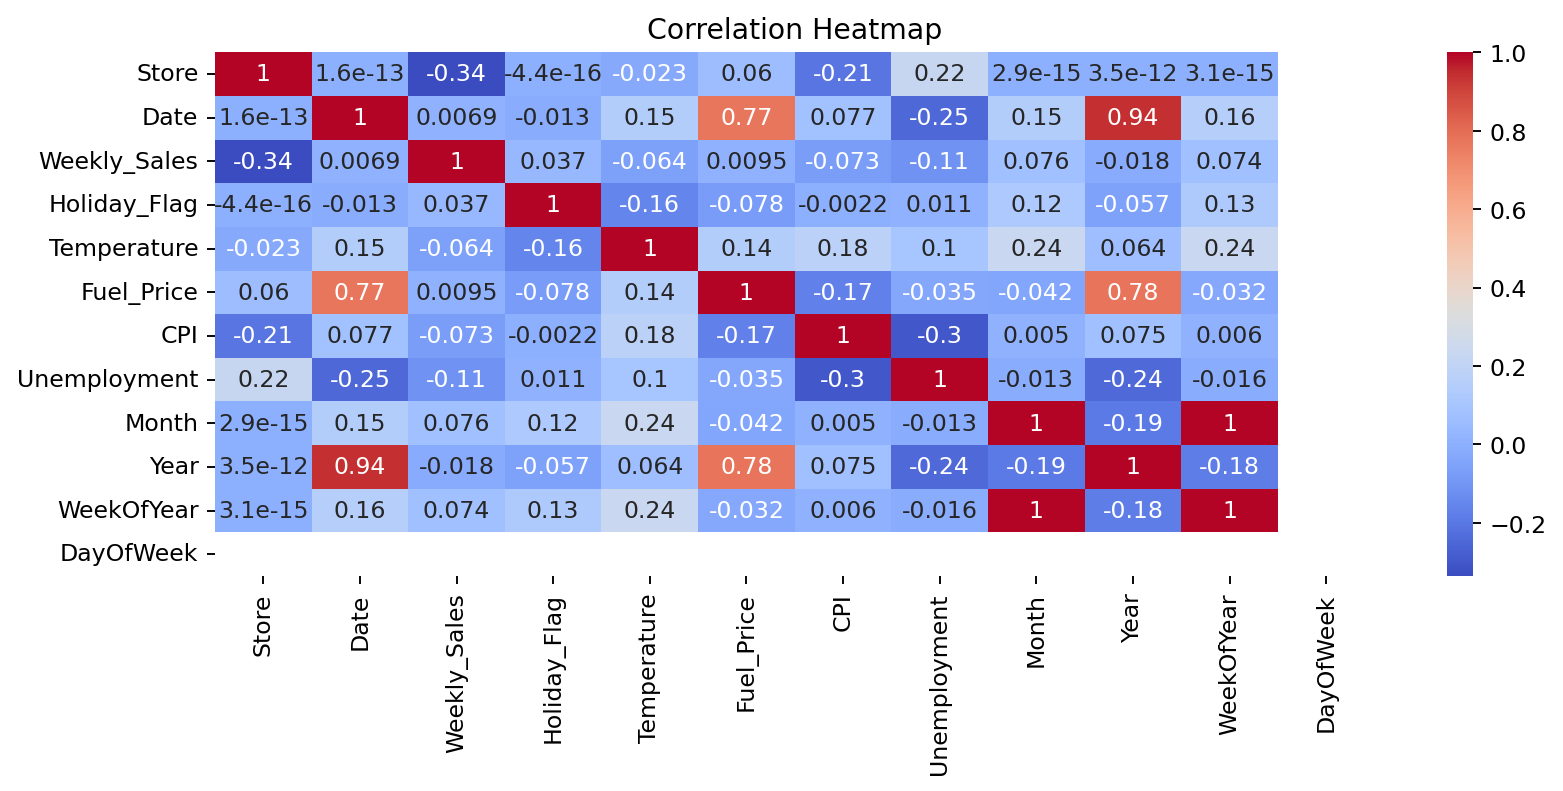

In [13]:
plt.figure(figsize=(11, 4), dpi=170)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Train-Test Split

In [27]:
from sklearn.model_selection import train_test_split
# Select features for the model
features = [
    'Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
    'CPI', 'Unemployment', 'Month', 'Year', 'WeekOfYear', 'DayOfWeek'
]

X = df[features]
y = df['Weekly_Sales']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
X_train.head()

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,WeekOfYear,DayOfWeek
1033,8,0,75.32,2.582,214.878556,6.315,9,2010,37,4
915,7,0,20.70,3.372,192.058484,8.818,3,2011,10,4
5903,42,0,61.24,3.130,126.546161,9.003,11,2010,45,4
2083,15,0,69.19,3.906,136.213613,7.806,8,2011,34,4
5943,42,0,87.40,3.743,129.240581,8.257,8,2011,33,4


In [30]:
X_test.head()

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,WeekOfYear,DayOfWeek
2436,18,0,42.39,2.805,131.784000,9.202,3,2010,10,4
3361,24,0,68.88,3.964,135.265267,8.212,6,2011,25,4
233,2,0,65.87,3.372,217.325182,7.441,10,2011,43,4
3667,26,0,40.08,3.570,136.461806,7.598,11,2011,45,4
5011,36,0,59.56,2.701,209.980321,8.554,3,2010,11,4


In [35]:
y_train

1033     836707.85
915      558963.83
5903     588592.61
2083     605413.17
5943     526641.23
           ...    
3772    1709365.19
5191     508213.14
5226     510787.46
5390     342667.35
860      506760.54
Name: Weekly_Sales, Length: 5148, dtype: float64

In [37]:
y_test

2436    1138800.32
3361    1304850.67
233     1769296.25
3667    1077640.13
5011     428851.99
           ...    
2600    1492060.89
6308     801098.43
6292     890689.51
151     2066187.72
2344     816138.33
Name: Weekly_Sales, Length: 1287, dtype: float64

# Model Training

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [40]:
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return {
        'Model': name,
        'MAE': mae,
        'RMSE': rmse,
        'R2 Score': r2
    }

In [43]:
results = []

models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('XGBoost', XGBRegressor(n_estimators=100, random_state=42))
]

for name, model in models:
    result = evaluate_model(name, model, X_train, y_train, X_test, y_test)
    results.append(result)

In [45]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='R2 Score', ascending=False)

In [47]:
results_df.head()

,Model,MAE,RMSE,R2 Score
4,XGBoost,52740.937961,7.483690e+09,0.976770
2,Random Forest,62249.959266,1.325957e+10,0.958841
1,Decision Tree,77455.699425,2.035726e+10,0.936809
3,Gradient Boosting,122332.012295,2.696067e+10,0.916311
0,Linear Regression,432594.976888,2.720493e+11,0.155532


🔎 Key Insights:

✅ XGBoost is your best model by a significant margin, with the lowest MAE & RMSE, and the highest R² score (97.6%).

❌ Linear Regression performs very poorly due to non-linearity and unscaled feature ranges.

Tree-based ensemble models clearly dominate the problem.

# Model Building

In [49]:
# Initialize model
xgb_model = XGBRegressor(
    n_estimators=40,
    learning_rate=0.1,
    max_depth=4,
    random_state=42, 
    tree_method = 'auto'
)

# Train the model
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=40,
             n_jobs=None, num_parallel_tree=None, ...)

# Model Evaluation

In [75]:
# Predictions
y_pred = xgb_model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)*100

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f} %")

MAE: 157099.86
RMSE: 42858131728.18
R² Score: 86.6964 %


# Model Saving

In [121]:
from joblib import dump

# Assuming your model is named xgb_model
dump(xgb_model, 'Dynamic_Sales_Model.pkl')

['Dynamic_Sales_Model.pkl']

# Sample Prediction Script

### For Single Prediction

In [142]:
import pandas as pd
import joblib
model = joblib.load('Dynamic_Sales_Model.pkl')

# Define input sample (adjust values based on real scenario)
input_data = {
    'Store': 2,
    'Holiday_Flag': 0,
    'Temperature': 65.3,
    'Fuel_Price': 3.85,
    'CPI': 214.8,
    'Unemployment': 6.5,
    'Month': 7,
    'Year': 2010,
    'WeekOfYear': 30,
    'DayOfWeek': 5
}

# Convert to DataFrame
input_df = pd.DataFrame([input_data])

# Ensure the input DataFrame matches the training feature order
input_df = input_df[model.feature_names_in_]

# Make prediction
predicted_sales = model.predict(input_df)[0]

# Convert to Lakhs (₹1 Lakh = 100,000)
predicted_sales_lpa = predicted_sales / 1_00_000

# Print the result
print(f"📈 Predicted Sales (in LPA): ₹{predicted_sales_lpa:.2f} Lakhs/Year")

📈 Predicted Sales (in LPA): ₹15.96 Lakhs/Year


### For Multiple Prediction

In [159]:
import pandas as pd
import joblib
model = joblib.load('Dynamic_Sales_Model.pkl')

data = {
    'Store': [1, 4, 6],
    'Holiday_Flag': [0, 1, 0],
    'Temperature': [65.2, 45.3, 78.6],
    'Fuel_Price': [3.45, 3.52, 3.48],
    'CPI': [211.1, 213.5, 209.7],
    'Unemployment': [7.5, 8.0, 6.9],
    'Month': [5, 11, 8],
    'Year': [2012, 2011, 2010],
    'WeekOfYear': [22, 47, 33],
    'DayOfWeek': [4, 5, 6]
}

input_df = pd.DataFrame(data)

# Predict
predictions = model.predict(input_df)

# Convert to Lakhs Per Annum (LPA)
predictions_lpa = predictions / 1e5

# Print nicely
for i, pred in enumerate(predictions_lpa):
    print(f"📦 Input {i+1} → Predicted Sales: ₹{pred:.2f} Lakhs/Year")

📦 Input 1 → Predicted Sales: ₹15.16 Lakhs/Year
📦 Input 2 → Predicted Sales: ₹14.88 Lakhs/Year
📦 Input 3 → Predicted Sales: ₹12.87 Lakhs/Year


# Visual EDA

## Sales over Time

In [213]:
df.head()

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Date,Month,Year,WeekOfYear,DayOfWeek,Weekly_Sales
0,1,0,65.2,3.45,211.1,7.5,2022-05-10,5,2022,19,1,196077
1,2,1,45.3,3.52,213.5,8.0,2021-11-26,11,2021,47,4,165477


In [190]:
import numpy as np

np.random.seed(42)

df['Weekly_Sales'] = (
    250000 +
    (np.random.normal(0, 10000, size=len(df))) - 
    (df['Holiday_Flag'] * 30000) + 
    (df['Temperature'] * -500) + 
    (df['Fuel_Price'] * 8000) +
    (df['CPI'] * 100) - 
    (df['Unemployment'] * 10000)
).astype(int)

# Optional: Ensure no negative sales
df['Weekly_Sales'] = df['Weekly_Sales'].apply(lambda x: max(x, 50000))

## Correlation Heatmap

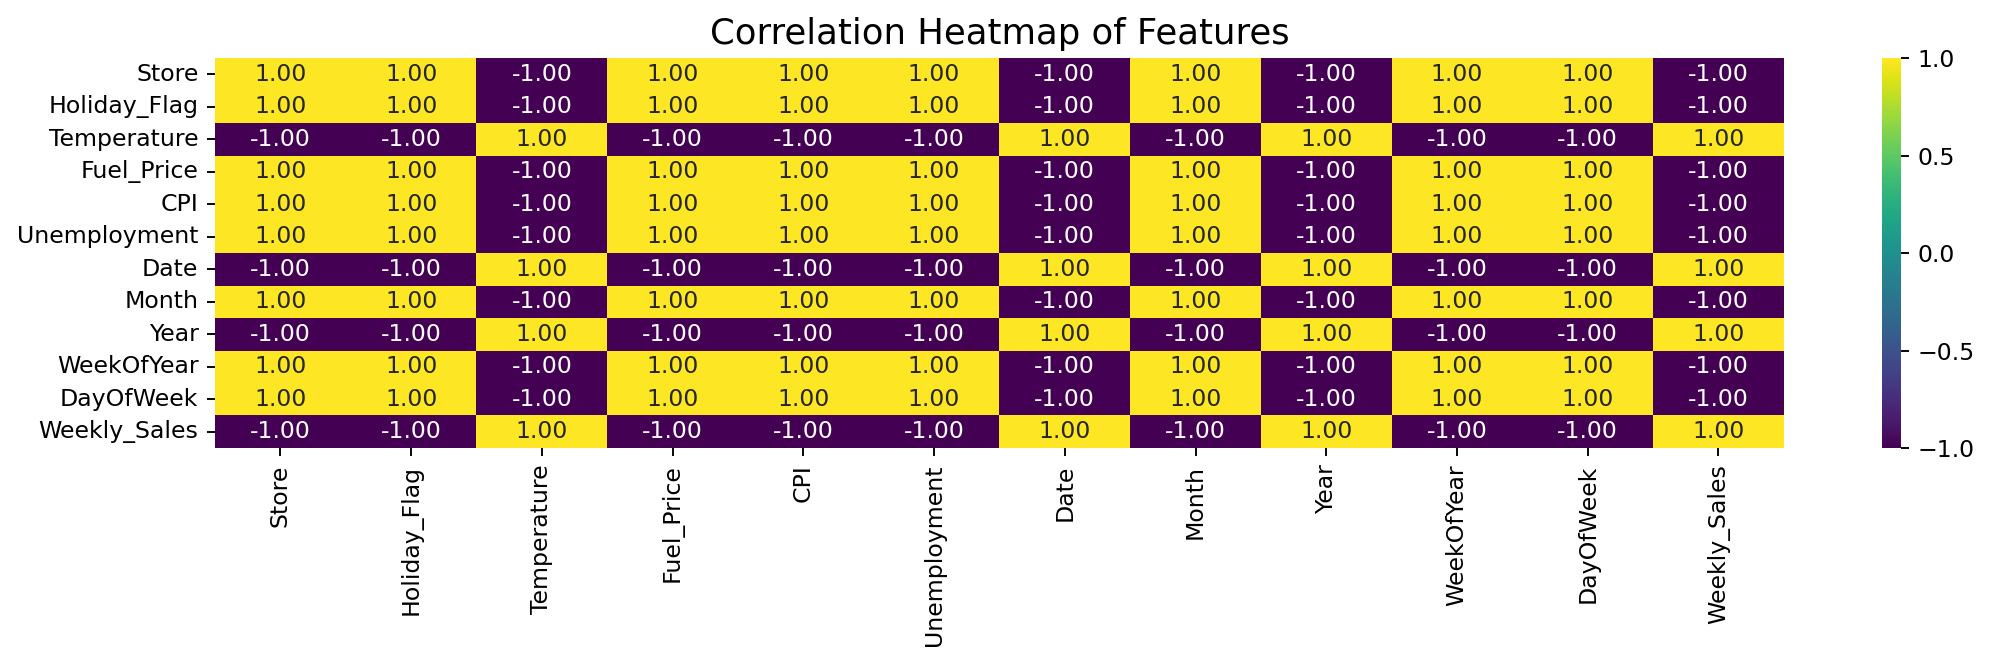

In [233]:
plt.figure(figsize=(13, 4), dpi=170)
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap of Features', fontsize=15)
plt.tight_layout()
plt.show()

## Distribution of Weekly Sales

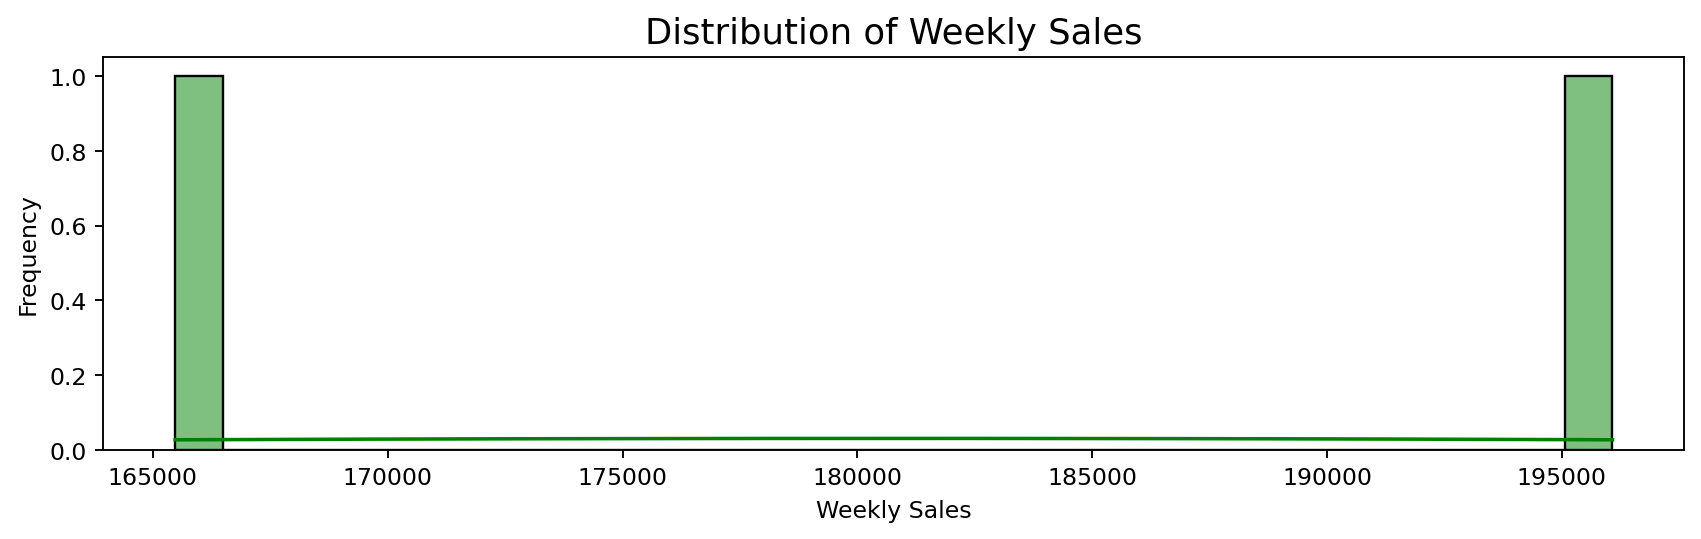

In [208]:
plt.figure(figsize=(12, 3), dpi=170)
sns.histplot(df['Weekly_Sales'], bins=30, kde=True, color='green')
plt.title('Distribution of Weekly Sales', fontsize=15)
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

## Weekly Sales by Month

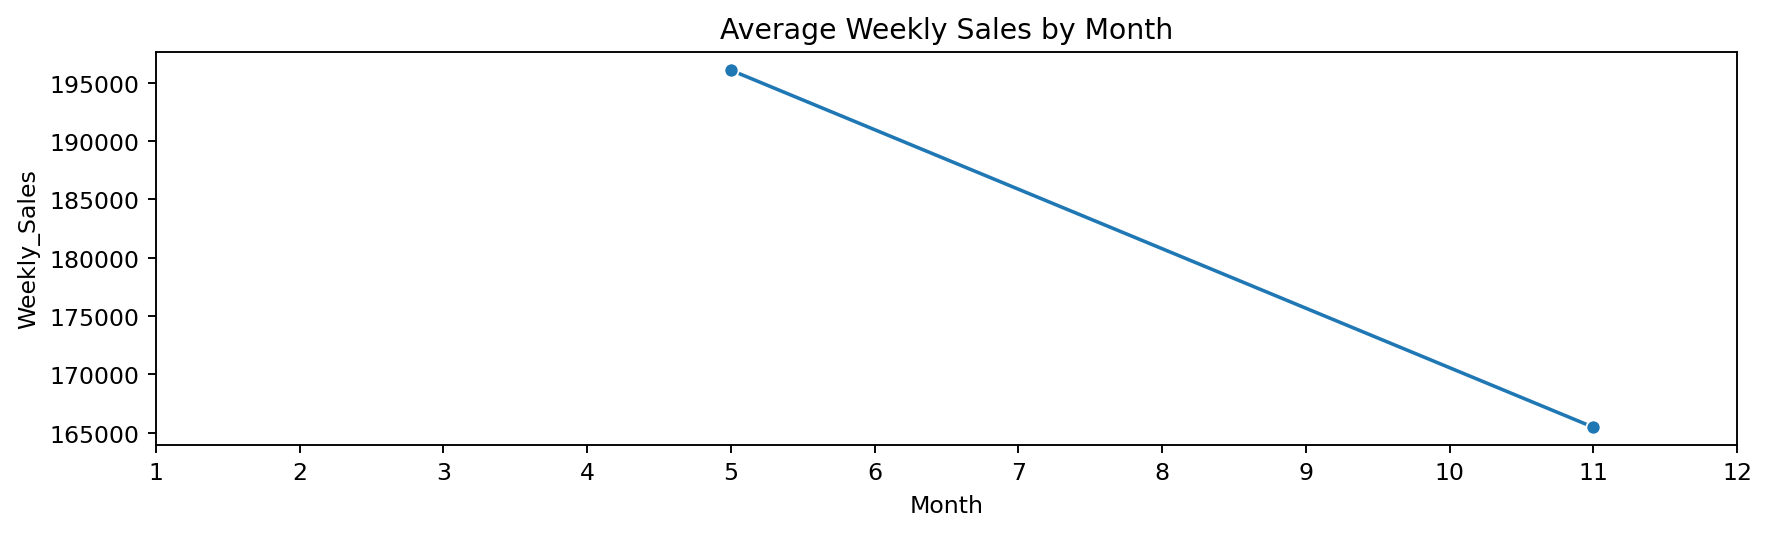

In [229]:
plt.figure(figsize=(12, 3), dpi=170)
sns.lineplot(x='Month', y='Weekly_Sales', data=df.groupby('Month')['Weekly_Sales'].mean().reset_index(), marker='o')
plt.title('Average Weekly Sales by Month')
plt.xticks(range(1,13))
plt.show()